In [16]:
#import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
#instatiate data variables for RVs (km/s)
#Here I start writing my code for importing the data as files

#V1481 = np.genfromtxt('V1481 Ori.rtf', skip_header=1, usecols=(0, 1, 2))
#=[datum[2] for datum in SDSS if datum[2] > 0]
#r=[datum[4] for datum in SDSS if datum[2] > 0]
#g=[datum[3] for datum in SDSS if datum[2] > 0]

V1481A = np.array([-17.04, 13.26, 59.44, 45.43, -8.61, -9.37, 63.91, -2.29, 55.55])
V1481B = np.array([96.34, 45.27, -43.73, -24.96, 78.60, 82.46, -50.16, 70.06, -37.94])
JD     = np.array([2453658.8320, 2453659.8226, 2453660.8243, 2453661.8003, 2453662.8240, 2453663.8200,
                   2453664.7964, 2453678.7838, 2453679.7282, 2453753.6614, 2453755.6823])
JDB    = np.array([2453659.8226, 2453660.8243, 2453661.8003, 2453662.8240, 2453663.8200,
                   2453664.7964, 2453679.7282, 2453753.6614, 2453755.6823])

DQTau1 = np.array([34.76, -2.93, 37.11, 37.38, 34.73, 31.64, 26.07, 23.51, 20.10, 17.31, 27.28, 36.99, 33.17,
                   35.11, 35.24, 28.81, 12.43, 40.09, 35.14, 35.89, 19.12, 37.08, 36.83, 12.75, -6.27, 14.82,
                   34.84,  3.16, 32.37, 39.09, 17.46, 22.67, 31.34])
DQTau2 = np.array([12.44, 56.13, 13.90, 15.01, 17.06, 20.70, 24.40, 27.30, 25.73, 27.86, 23.67, 7.64, 10.94,
                   09.87, 10.05, 19.93, 33.26, 13.83, 11.47, 16.98, 26.86, 10.20, 14.36, 23.86, 50.94, 37.61,
                   07.51, 52.75, 17.20, 08.27, 34.61, 26.25, 11.49])
HJD    = np.array([45982.0293, 46389.8446, 46745.8122, 47073.9364, 47075.9910, 47078.0084, 47127.8232, 47128.8081,
                   47159.6132, 47159.6318, 47427.9265, 47546.6122, 47546.6272, 47546.6272, 47546.6423, 47789.9412,
                   47840.8048, 47845.8709, 47896.7312, 47898.7686, 47902.6961, 48525.9580, 48670.6445, 48871.9572,
                   49344.8584, 49373.6908, 49410.6311, 49644.8270, 49699.8045, 53693.8806, 56578.9704, 56606.9106,
                   56650.8257])

m,b = np.polyfit(V1481A, V1481B, 1)

Directly below this cell is the mass ratio code, yay!

-1.84521049763


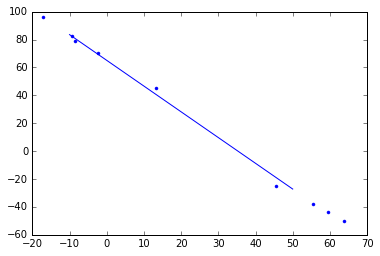

In [45]:
plt.plot(V1481A, V1481B, 'b.')
plt.plot(np.linspace(-10, 50, num= 10), m*np.linspace(-10, 50, num= 10)+b)
print(m)

Below is the deprecated least squares code for finding semiamplitudes. It does what it is supposed to, but it is misguided.

0.54205759220466621

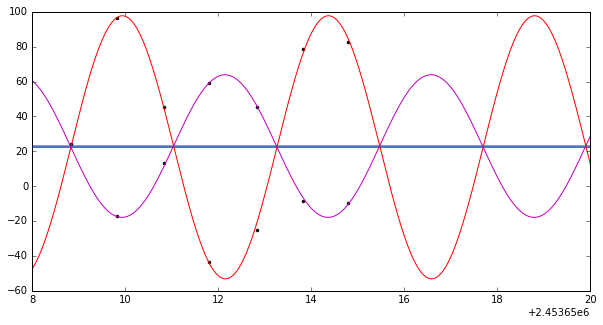

In [5]:
#the following function will alter the time arrays into useful matrices for least squares approximation
#returns the input array, converted into a matrix of the required form when 3 parameters are present
#3 parameters are amplitude, phase shift, and vertical offset
def dataconvert(data):
    matrix = np.ones((data.size, 3))
    for i in range(0, data.size):
        matrix[i, 1] = np.cos((2*np.pi/V1481P)*data[i])
        matrix[i, 2] = np.sin((2*np.pi/V1481P)*data[i])
    matrix = np.matrix(matrix)
    return matrix

A   = dataconvert(JD)
AtA = np.matmul(np.transpose(A), A)
AtB = np.matmul(np.transpose(A), V1481A)
#np.linalg.solve(AtA, np.transpose(AtB))

#The parameters here are the systemic velocity, then the coefficients
#on the cosine and sine functions
#now for the second star!

A   = dataconvert(JDB)
AtA = np.matmul(np.transpose(A), A)
AtB = np.matmul(np.transpose(A), V1481B)

#np.linalg.solve(AtA, np.transpose(AtB))
plt.figure(figsize=(10,5))
t = np.linspace(2453658, 2453756, num = 10000)
plt.plot(JDB, V1481B, 'k.')
plt.plot(JD, V1481A, 'k.')
plt.plot(t, 23*np.ones(10000))
plt.plot(t, 22.3*np.ones(10000))
plt.plot(t, 23+1.88*np.cos((2*np.pi/4.433)*t)+40.85*np.sin((2*np.pi/4.433)*t), 'm') #A
plt.plot(t, 22.3-2.41*np.cos((2*np.pi/4.433)*t)-75.4*np.sin((2*np.pi/4.433)*t), 'r') #B
plt.xlim(2453658, 2453670)
plt.savefig("figure1.png")
#Mass ratio is the ratio of the two semiamplitudes
np.sqrt((1.87561427)**2+(40.84819907)**2)/np.sqrt((-2.41446562)**2+(-75.39842259)**2)